In [1]:
# for reading in data
import os
from pathlib import Path

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Find our data set

In [3]:
home = Path.cwd()

In [4]:
home.parent

PosixPath('/Users/austinlasseter/atelier/generalassembly/intuit-ds-9/05-data-visualization')

In [5]:
datadir = Path.joinpath(home.parent, 'data')
datadir

PosixPath('/Users/austinlasseter/atelier/generalassembly/intuit-ds-9/05-data-visualization/data')

In [6]:
# what's in there?
os.listdir(datadir)

['ufo2.csv',
 'heart-disease.txt',
 'drinks.csv',
 'autoMPG.csv',
 'imdb_1000.csv',
 'ufo.csv',
 'sales_info.csv',
 'titanic.csv',
 'boston_housing_data.csv',
 'cleveland_heart_data.csv']

In [7]:
# Create a filepath
datafilepath = Path.joinpath(home.parent, 'data', 'titanic.csv')

In [8]:
# read in my data
df = pd.read_csv(datafilepath)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [9]:
df = pd.read_csv('../data/titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


## Categorical-type vs. Object-type variabales

In [10]:
# Embarked is an object-type variable
df['Embarked'].dtypes

dtype('O')

In [11]:
# an object-type variable naturally sorts in alphabetic order
df['Embarked'].value_counts().sort_index(ascending=True)

Cherbourg      130
Queenstown      28
Southampton    554
Name: Embarked, dtype: int64

In [12]:
# but what if you want a different order - the sequence in which the ship made ports-of-call?
port_order = ['Southampton', 'Queenstown', 'Cherbourg']


In [13]:
# use that list to make a new variable, and check out its type
df['embark_ports']=pd.Series(df['Embarked'], dtype='category')
df['embark_ports'] = df['embark_ports'].cat.set_categories(port_order, ordered=True)
df['embark_ports'].dtypes

CategoricalDtype(categories=['Southampton', 'Queenstown', 'Cherbourg'], ordered=True)

In [14]:
# now the sort order is improved.
df['embark_ports'].value_counts().sort_index(ascending=True)

Southampton    554
Queenstown      28
Cherbourg      130
Name: embark_ports, dtype: int64

## Create categorical variables

In [15]:
# Create a categorical variable
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,embark_ports,cabin_class
0,0,3,male,22.0,7.2500,Southampton,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,Southampton,third


In [16]:
# Create a survival variable using a different method! 
df['death_var']=np.where(df['Survived']==1, 'lived', 'died')
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,embark_ports,cabin_class,death_var
0,0,3,male,22.0,7.2500,Southampton,Southampton,third,died
1,1,1,female,38.0,71.2833,Cherbourg,Cherbourg,first,lived
2,1,3,female,26.0,7.9250,Southampton,Southampton,third,lived
3,1,1,female,35.0,53.1000,Southampton,Southampton,first,lived
4,0,3,male,35.0,8.0500,Southampton,Southampton,third,died


## Create a categorical variable from a continuous variable

In [17]:
# Let's create bins from a continiuous variable!
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
# binning the age variable
mybins = [0, 20, 28, 38, 80]
mylabels = ['children', 'young adults', 'middle aged', 'elderly']
df['age_groups'] = pd.cut(df['Age'], bins=mybins, labels=mylabels)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,embark_ports,cabin_class,death_var,age_groups
0,0,3,male,22.0,7.2500,Southampton,Southampton,third,died,young adults
1,1,1,female,38.0,71.2833,Cherbourg,Cherbourg,first,lived,middle aged
2,1,3,female,26.0,7.9250,Southampton,Southampton,third,lived,young adults
3,1,1,female,35.0,53.1000,Southampton,Southampton,first,lived,middle aged
4,0,3,male,35.0,8.0500,Southampton,Southampton,third,died,middle aged


In [20]:
# you can sort the results of value_counts by index or values
print(df['age_groups'].value_counts().sort_index(ascending=False))
df['age_groups'].value_counts().sort_values(ascending=False)

elderly         176
middle aged     174
young adults    183
children        179
Name: age_groups, dtype: int64


young adults    183
children        179
elderly         176
middle aged     174
Name: age_groups, dtype: int64

### Binning the fare groups

In [21]:
# create a new variable binning the fare groups
farebins=[0,8,15,33,512]
farelabels=['low_income', 'med_income', 'hi_income','vhi_income']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels) 

In [22]:
# note: pd.cut  automatically creates a categorical variable
df['fare_groups'].dtypes

CategoricalDtype(categories=['low_income', 'med_income', 'hi_income', 'vhi_income'], ordered=True)

In [23]:
df['fare_groups'].value_counts()

med_income    189
hi_income     185
vhi_income    174
low_income    154
Name: fare_groups, dtype: int64

## Let's Visualize!

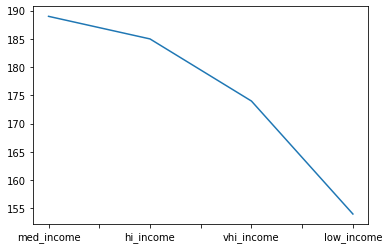

In [56]:
# just use `.plot` at the end of a pandas statement
df['fare_groups'].value_counts().plot();

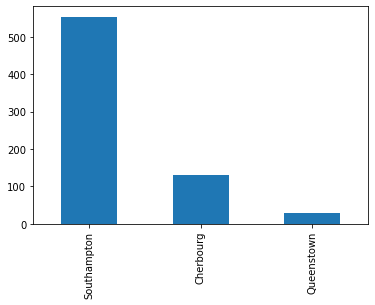

In [57]:
# or you can specify "kind"
embarked_counts = df['Embarked'].value_counts()
embarked_counts.plot(kind = 'bar');

In [58]:
sex_counts = df['Sex'].value_counts()
sex_counts

male      453
female    259
Name: Sex, dtype: int64

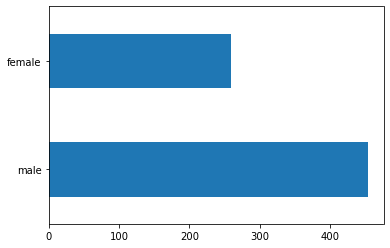

In [59]:
sex_counts.plot(kind = 'barh');

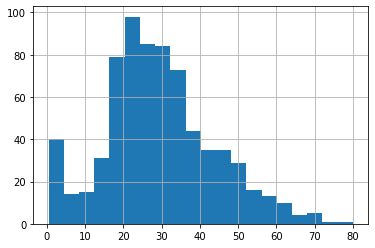

In [62]:
# histograms are useful for continuous variables like age and fare.
df['Age'].hist(bins=20);

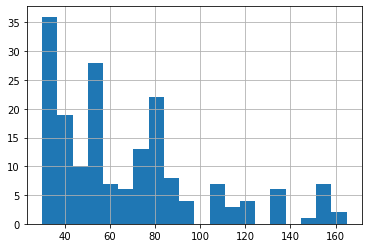

In [68]:
# remember that you can add filters when you do this
df[(df['Fare']>30) & (df['Fare']<200)]['Fare'].hist(bins=20);

## Crosstabs as bar charts

In [29]:
# Combo: Sex by embarked.
sex_embark = pd.crosstab(df['Embarked'], df['Sex'])
sex_embark

Sex,female,male
Embarked,,
Cherbourg,61,69
Queenstown,12,16
Southampton,186,368


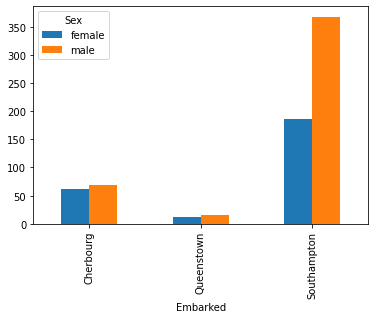

In [30]:
# Grouped Bar chart
sex_embark.plot(kind='bar');

In [31]:
# cabin class by death var
cab_death = pd.crosstab(df['cabin_class'], df['death_var'])
cab_death

death_var,died,lived
cabin_class,,
first,64,120
second,90,83
third,270,85


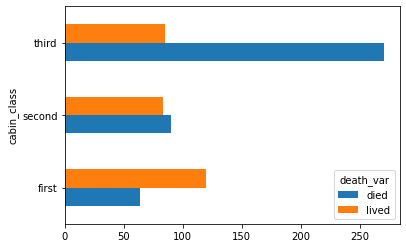

In [32]:
cab_death.plot(kind='barh');

## bar charts: categorical by numeric

In [33]:
# average survival
surv = df['Survived'].mean()

In [34]:
surv = round(surv, 4)

In [35]:
# survival by cabin class
cab_survive = df.groupby('cabin_class')['Survived'].mean()
cab_survive

cabin_class
first     0.652174
second    0.479769
third     0.239437
Name: Survived, dtype: float64

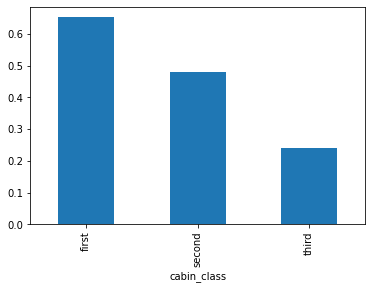

In [36]:
cab_survive.plot(kind='bar');
# plt.savefig('myfigure.png')

## Scatterplots

In [37]:
# Age by fare.
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
df['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

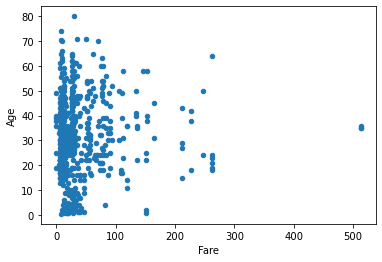

In [39]:
# two variables
df.plot(kind = 'scatter', x='Fare', y='Age');

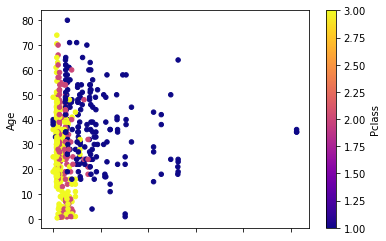

In [40]:
# three continuous variables
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma');

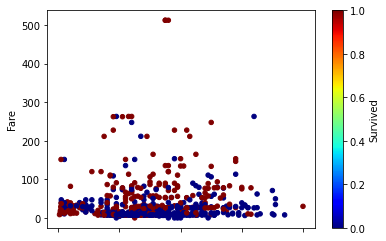

In [41]:
df.plot(kind = 'scatter', x='Age', y='Fare', c='Survived', colormap='jet');

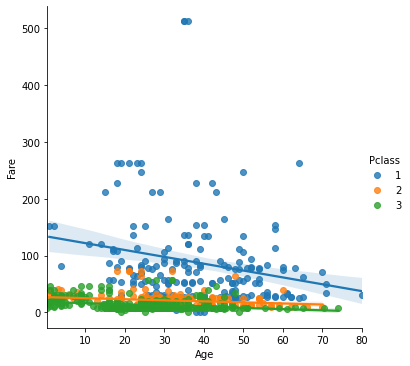

In [42]:
# Same thing with seaborn
sns.lmplot(y='Fare', x='Age', data=df, hue='Pclass');

# Box plots

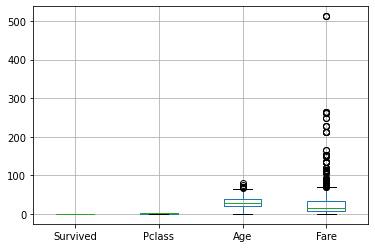

In [43]:
df.boxplot();

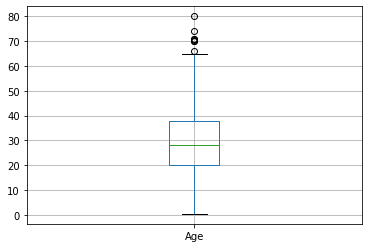

In [44]:
df.boxplot(column='Age');

In [45]:
df['age_groups'].value_counts()

young adults    183
children        179
elderly         176
middle aged     174
Name: age_groups, dtype: int64

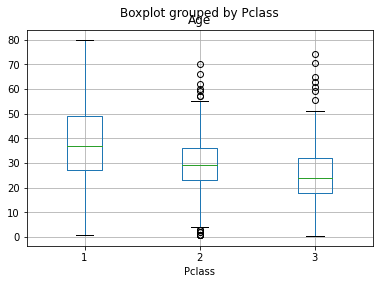

In [46]:
df.boxplot(column="Age", by='Pclass');

# Heat Maps

In [47]:
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356462,-0.082446,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.552893
Age,-0.082446,-0.365902,1.000000,0.093143
Fare,0.266100,-0.552893,0.093143,1.000000


In [48]:
corr_matrix['Survived']

Survived    1.000000
Pclass     -0.356462
Age        -0.082446
Fare        0.266100
Name: Survived, dtype: float64

In [49]:
corr_matrix.index

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

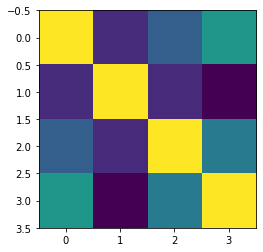

In [50]:
# heatmap
plt.imshow(corr_matrix);

# Pie chart

In [51]:
cabin_variable = df['cabin_class'].value_counts()

In [52]:
cabin_variable

third     355
first     184
second    173
Name: cabin_class, dtype: int64

In [53]:
mylabels = cabin_variable.index

In [54]:
myvalues = cabin_variable.values

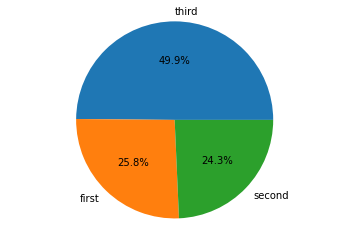

In [55]:
# pie chart
fig1, ax1 = plt.subplots()
ax1.pie(myvalues, labels=mylabels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()